In [1]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [3]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [5]:
df['dataset'].value_counts()

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

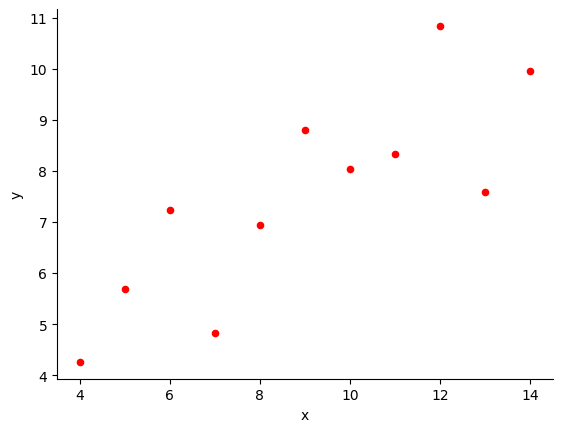

In [4]:
df.loc[df['dataset'] == 'I'].plot(x='x', y='y', kind='scatter', color='red');
sns.despine()

/Users/anat/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


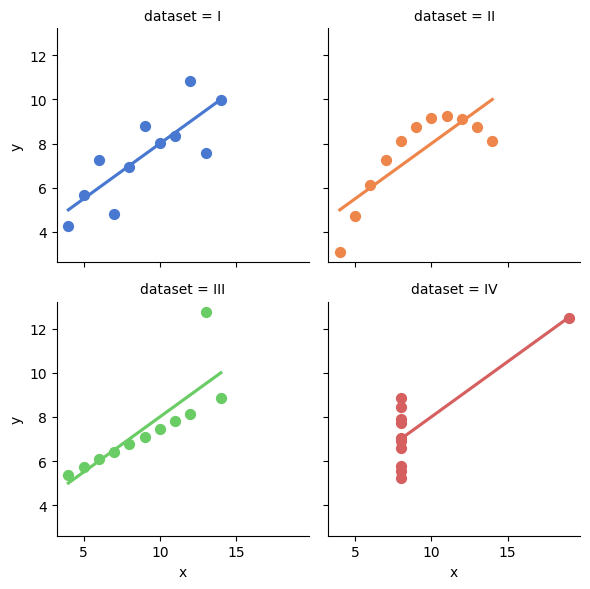

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=3, scatter_kws={"s": 50, "alpha": 1}
);

## 5. Example on the Penguins Dataset

In [7]:
penguins = sns.load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
penguins.dropna(inplace=True)

In [9]:
penguins.drop(columns=['species','island','sex'], inplace=True)

## Let's fit a LR model between the body mass of penguins and their body measurements

In [10]:
## step 1: let's check the correlation between the body mass and the bill and flipper measurements

penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


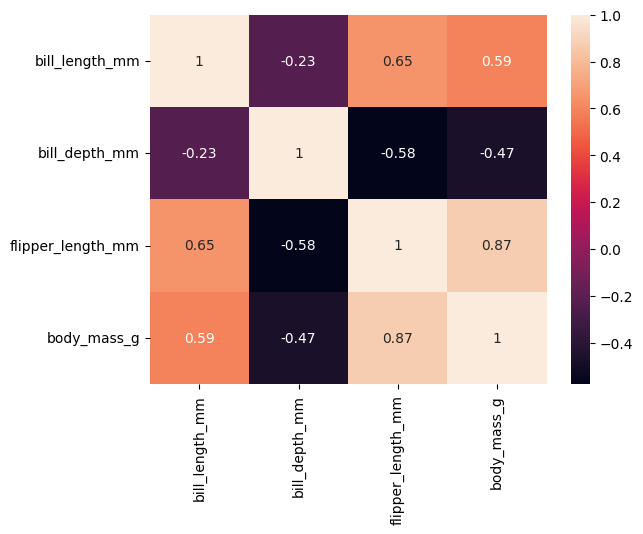

In [11]:
sns.heatmap(penguins.corr(),annot=True);

/Users/anat/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


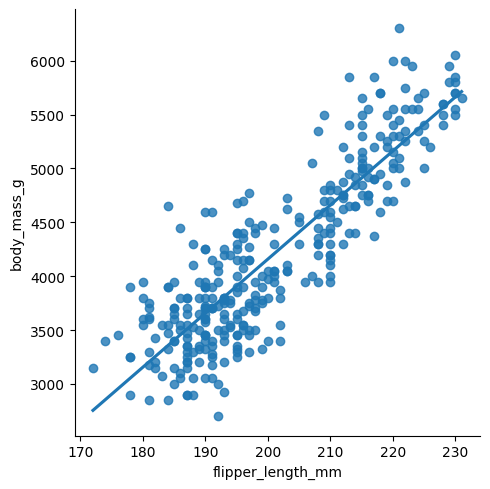

In [12]:
sns.lmplot(data=penguins, x='flipper_length_mm', y='body_mass_g', ci=None);

/Users/anat/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


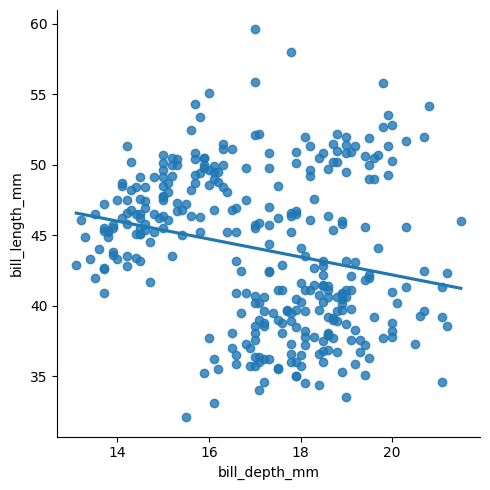

In [13]:
sns.lmplot(data=penguins, x='bill_depth_mm', y='bill_length_mm', ci=None);

### Building a linear regression model using one independent variable:

In [14]:
model1 = sm.ols(formula='body_mass_g ~ flipper_length_mm', data=penguins).fit()  # instantiate and fit the model



In [15]:
model1.rsquared_adj

0.7613734025287308

In [16]:
model1.params

Intercept           -5872.092683
flipper_length_mm      50.153266
dtype: float64

#### How can you interpret the parameters (coefficient and intercept)?

- Intercept (-5872.092683): Instead, the intercept is a constant term that helps adjust the regression line's position. It's important for the overall fit of the model but doesn't have a direct physical interpretation in this case.

- Flipper Length Coefficient (50.153266): This coefficient represents the change in the predicted value of the dependent variable for a one-unit change in the corresponding independent variable. Here for every one-unit increase in flipper length (mm), the predicted value of the dependent variable (whatever you're predicting) is expected to increase by approximately 50.15 units.

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.13e-105
Time:                        15:42:25   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Building a linear regression model using two independent variable:

In [19]:
model2 = sm.ols(formula='body_mass_g ~ bill_depth_mm + bill_length_mm', data=penguins).fit()  # instantiate and fit the model

